In [2]:
import os

import matplotlib.pyplot as plt
import pandas
import numpy
import matplotlib
from env import *
from visualiser import *
from main import *
from constants import *
import xlsxwriter
%matplotlib inline

In [ ]:
env = Env(
	width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=ROBOT_NUMBER,
	desired_X=DX, desired_Y=DY, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
	buffer_size=MAX_T
)

In [ ]:

directory = '_run_w1'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость']
	)
df.set_index('id', inplace=True)

w2 = 1
run = 0
for w1 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2)
	# episode_gui(env, w1, w2, w3)

	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[0], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

In [ ]:

directory = '_run_w2'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость']
	)
df.set_index('id', inplace=True)

w1 = 1
run = 0
for w2 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2)
	# episode_gui(env, w1, w2, w3)
	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[1], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

In [ ]:

directory = '_run_w15'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость']
	)
df.set_index('id', inplace=True)

w2 = 5
run = 0
for w1 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2)
	# episode_gui(env, w1, w2, w3)

	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[0], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

In [ ]:

directory = '_run_w25'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость']
	)
df.set_index('id', inplace=True)

w1 = 1
run = 0
for w2 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2)
	# episode_gui(env, w1, w2, w3)
	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history)]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[1], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

In [ ]:
#current_episode_replay(env)
directory = '_run_w1'
show_episode(directory, 98)

In [4]:
full_report = 'report.xls'
writer = pandas.ExcelWriter(full_report, engine='xlsxwriter')



#workbook.close()








w2=1
w3=1

Index(['Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


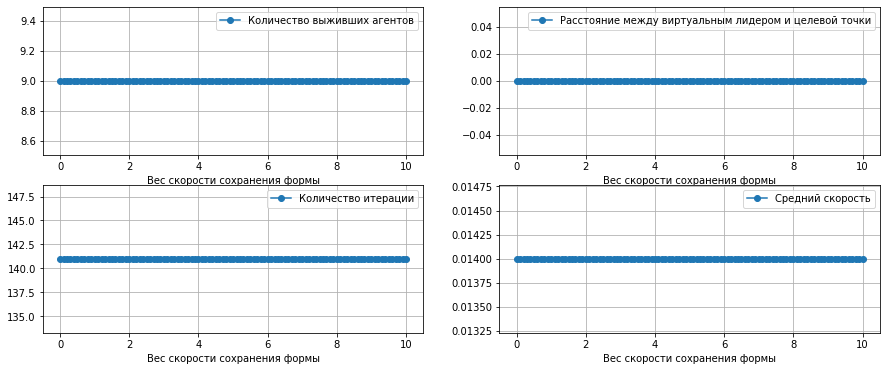

In [6]:
fill_report_with_graph('_run_w1', 0, writer=writer)
# df=pandas.read_excel('_run_w1/report.xls')
# df.plot(x=df.columns[2] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w3=1

Index(['Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


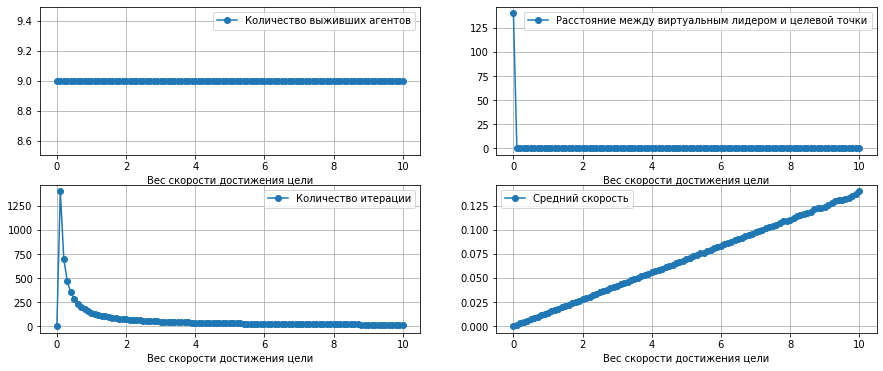

In [7]:
fill_report_with_graph('_run_w2', 1,  writer=writer)

# df=pandas.read_excel('_run_w2/report.xls')
# df.plot(x=df.columns[3] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=5
w3=1

Index(['Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


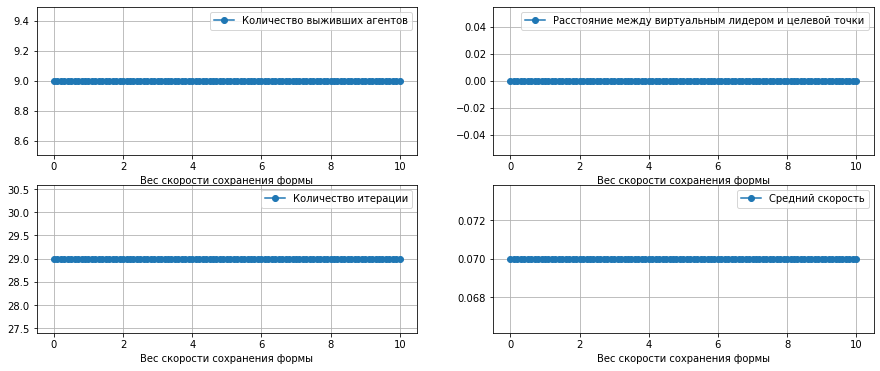

In [8]:
fill_report_with_graph('_run_w15', 0,  writer=writer)

# df=pandas.read_excel('_run_w2_w15/report.xls')
# df.plot(x=df.columns[3] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=1

Index(['Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость'],
      dtype='object')


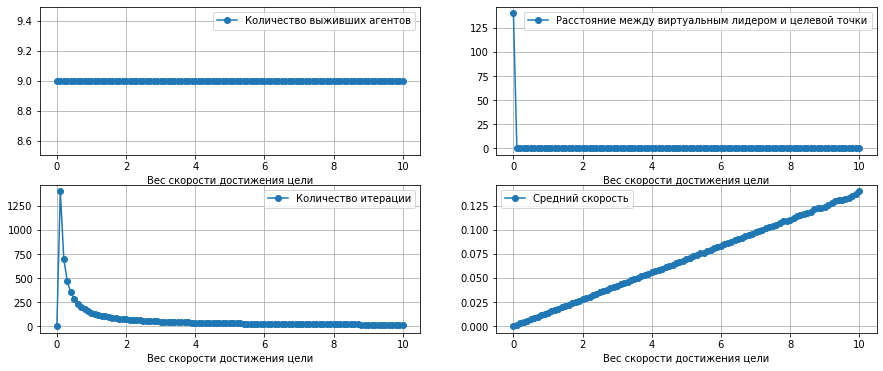

In [9]:
fill_report_with_graph('_run_w25', 1, writer=writer)

# df=pandas.read_excel('_run_w3/report.xls')
# df.plot(x=df.columns[4] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=0

In [10]:
writer.close()
